In [1]:
# this cell is hidden via cell metadata
import tempfile, os
startdir = os.path.abspath('.')
tmpdir = tempfile.mkdtemp()
os.chdir(tmpdir)

from nbodykit import style
import matplotlib.pyplot as plt
plt.style.use(style.notebook)

/home/yfeng1/anaconda3/install/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


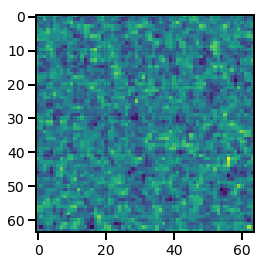

In [2]:
from nbodykit.lab import LinearMesh, cosmology
from matplotlib import pyplot as plt

cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift=0, transfer='EisensteinHu')

mesh = LinearMesh(Plin, Nmesh=128, BoxSize=1380, seed=42)

density = mesh.preview(Nmesh=64, axes=(0,1))
plt.imshow(density)

In [3]:
# save the RealField
mesh.save('linear-mesh-real.bigfile', mode='real', dataset='Field')

# save the ComplexField
mesh.save('linear-mesh-complex.bigfile', mode='real', dataset='Field')

In [4]:
from nbodykit.lab import BigFileMesh
import numpy

# load the mesh in the form of a RealField
real_mesh = BigFileMesh('linear-mesh-real.bigfile', 'Field')

# return the RealField via paint
rfield = real_mesh.paint(mode='real')

# load the mesh in the form of a ComplexField
complex_mesh = BigFileMesh('linear-mesh-complex.bigfile', 'Field')

# FFT to get the ComplexField as a RealField
rfield2 = complex_mesh.paint(mode='real')

# the two RealFields must be the same!
numpy.allclose(rfield.value, rfield2.value)

True

In [5]:
def filter(k, v):
    kk = sum(ki ** 2 for ki in k) # k^2 on the mesh
    kk[kk == 0] = 1
    return v / kk # divide the mesh by k^2

# apply the filter and get a new mesh
filtered_mesh = mesh.apply(filter, mode='complex', kind='wavenumber')

# get the filtered RealField object
filtered_rfield = filtered_mesh.paint(mode='real')

print("head of filtered Realfield = ",  filtered_rfield[:10,0,0])
print("head of original RealField = ",  rfield[:10,0,0])

head of filtered Realfield =  [1094.8562 1060.4702 1058.0209 1059.883  1067.5662 1104.8212 1150.1516
 1193.5796 1244.2278 1295.758 ]
head of original RealField =  [0.14927006 0.85538614 1.7375357  2.270503   1.6951047  1.9259002
 1.4472127  0.8612448  0.8651851  1.6219351 ]


In [6]:
from nbodykit.lab import LinearMesh, cosmology

# linear mesh
Plin = cosmology.LinearPower(cosmology.Planck15, redshift=0.55, transfer='EisensteinHu')
source = LinearMesh(Plin, Nmesh=64, BoxSize=512, seed=42)

# paint, re-sampling to Nmesh=32
real = source.paint(mode='real', Nmesh=32)

print("original Nmesh = ", source.attrs['Nmesh'])
print("resampled Nmesh = ", real.Nmesh)
print("shape of resampled density field = ", real.cshape)

original Nmesh =  [64 64 64]
resampled Nmesh =  [32 32 32]
shape of resampled density field =  [32 32 32]


In [7]:
import shutil
os.chdir(startdir)
shutil.rmtree(tmpdir)